# <font color=blue> All Imports </font>

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import chardet
import warnings
warnings.filterwarnings('ignore')

# <font color=blue> Checkpoint 1 </font>

## Read companies.csv

In [7]:
companies = pd.read_csv('companies.csv',  encoding ='palmos')
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


## Number of records

In [8]:
companies.shape

(66368, 10)

## Create a copy

In [9]:
companies_cp = companies.copy()

## Check unique companies in permalink column

In [10]:
companies_cp.permalink = companies_cp.permalink.str.lower()

In [11]:
len(companies_cp.permalink.unique())

66368

## Read rounds2 csv

In [12]:
rounds2 = pd.read_csv('rounds2.csv', encoding='palmos')
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


## number of records

In [13]:
rounds2.shape

(114949, 6)

## create a copy

In [14]:
rounds2_cp = rounds2.copy()

## Check for unique companies in company_permalink

In [15]:
rounds2_cp.company_permalink = rounds2_cp.company_permalink.str.lower()

In [16]:
len(rounds2_cp.company_permalink.unique())

66368

## extract extra companies in rounds2

In [17]:
other_companies = rounds2_cp[~rounds2_cp.company_permalink.isin(companies_cp.permalink)]

In [18]:
len(other_companies)

0

### Merge to master_frame

In [19]:
master_frame = pd.merge(companies_cp, rounds2_cp, how='inner', left_on='permalink', right_on='company_permalink')

### Drop duplicate column

In [20]:
master_frame = master_frame.drop(['company_permalink'], axis=1)

### Number of records in master data frame

In [21]:
master_frame.shape

(114949, 15)

## Data preprocessing

### Create a copy

In [1549]:
master_frame_raw = master_frame.copy()

### Find if all values in a row are NULL

In [1550]:
master_frame[master_frame.isnull().all(1)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


### Find NULLs in columns

In [1551]:
round(master_frame.isnull().sum().apply(lambda x: (x/master_frame.shape[0])*100), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

### Drop the columns with many NULLs and other unuseful columns for analysis

In [1552]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('region', axis=1)

### Drop the rows with no 'raised_amount_usd' since its about 17% and not useful

### These NULLs in 'raised_amount_usd' will get filtered with condition 5-15 million if imputed with zeroes and will not help with median imputting too

In [1553]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

### Drop the 'category_list' with nulls since its about 3% and not useful

### These categories shall be mapped to Blanks anyways in the future which is not useful

In [1554]:
master_frame = master_frame[~master_frame.category_list.isnull()]

### Lets impute values to NULLs in country_code as 'UNK' for 'unknown'

In [1555]:
master_frame.country_code = master_frame.country_code.fillna('UNK')

In [1556]:
round(master_frame.isnull().sum().apply(lambda x: (x/master_frame.shape[0])*100), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

### Percentage of data lost

In [1557]:
(1-(master_frame.shape[0]/master_frame_raw.shape[0]))*100

18.298549791646735

In [1558]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,UNK,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0


In [1559]:
master_frame.shape

(93915, 9)

## <font color=blue> Checkpoint 2 </font>

### Create copy

In [1560]:
master_frame_cp = master_frame.copy()

### Take only 4 types of funding

In [1561]:
master_frame_cp = master_frame_cp[master_frame_cp.funding_round_type.isin(['venture', 'seed', 'angel', 'private_equity'])]

### Check for Outliers

In [1562]:
round(master_frame_cp.groupby('funding_round_type').raised_amount_usd.median(),2).sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                277240.0
Name: raised_amount_usd, dtype: float64

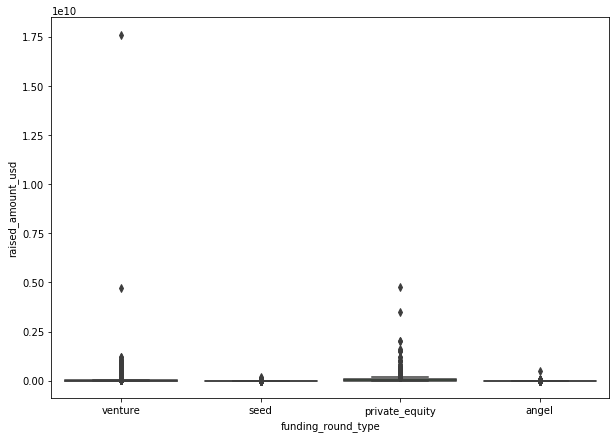

In [1563]:
plt.figure(figsize=(10,7))
sns.boxplot(data=master_frame_cp, x='funding_round_type', y='raised_amount_usd')
plt.show()

### Individual Boxplots without Outliers

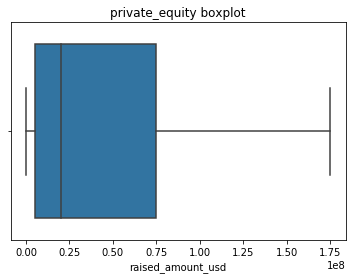

In [1565]:
plt.title('private_equity boxplot')
sns.boxplot(master_frame_cp[master_frame_cp.funding_round_type.isin(['private_equity'])].raised_amount_usd, showfliers=False)
plt.show()

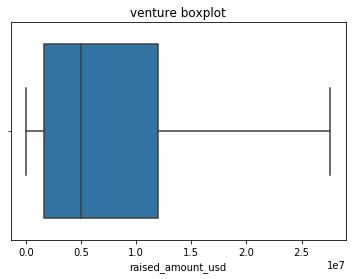

In [1566]:
plt.title('venture boxplot')
sns.boxplot(master_frame_cp[master_frame_cp.funding_round_type.isin(['venture'])].raised_amount_usd, showfliers=False)
plt.show()

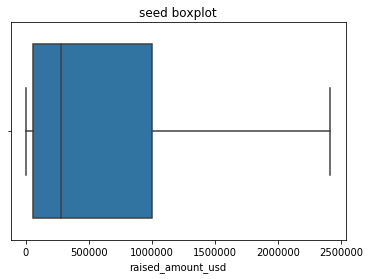

In [1567]:
plt.title('seed boxplot')
sns.boxplot(master_frame_cp[master_frame_cp.funding_round_type.isin(['seed'])].raised_amount_usd, showfliers=False)
plt.show()

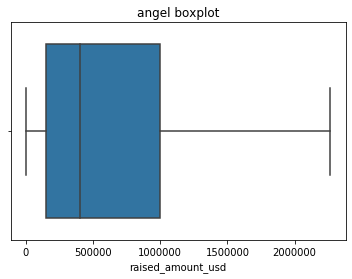

In [1568]:
plt.title('angel boxplot')
sns.boxplot(master_frame_cp[master_frame_cp.funding_round_type.isin(['angel'])].raised_amount_usd, showfliers=False)
plt.show()

## Remove Outliers and estimate Mean

In [1569]:
private_equity_type = master_frame_cp[master_frame_cp.funding_round_type.isin(['private_equity'])].raised_amount_usd
Q1 = private_equity_type.quantile(0.25)
Q3 = private_equity_type.quantile(0.75)
IQR = Q3 - Q1
private_equity_mean = round(private_equity_type[(private_equity_type >= (Q1 - 1.5 * IQR)) & (private_equity_type <= (Q3 + 1.5 * IQR))].mean(), 2)
private_equity_type = private_equity_type[(private_equity_type >= (Q1 - 1.5 * IQR)) & (private_equity_type <= (Q3 + 1.5 * IQR))]

In [1570]:
venture_type = master_frame_cp[master_frame_cp.funding_round_type.isin(['venture'])].raised_amount_usd
Q1 = venture_type.quantile(0.25)
Q3 = venture_type.quantile(0.75)
IQR = Q3 - Q1
venture_mean = round(venture_type[(venture_type >= (Q1 - 1.5 * IQR)) & (venture_type <= (Q3 + 1.5 * IQR))].mean(), 2)
venture_type = venture_type[(venture_type >= (Q1 - 1.5 * IQR)) & (venture_type <= (Q3 + 1.5 * IQR))]

In [1571]:
seed_type = master_frame_cp[master_frame_cp.funding_round_type.isin(['seed'])].raised_amount_usd
Q1 = seed_type.quantile(0.25)
Q3 = seed_type.quantile(0.75)
IQR = Q3 - Q1
seed_mean = round(seed_type[(seed_type >= (Q1 - 1.5 * IQR)) & (seed_type <= (Q3 + 1.5 * IQR))].mean(), 2)
seed_type = seed_type[(seed_type >= (Q1 - 1.5 * IQR)) & (seed_type <= (Q3 + 1.5 * IQR))]

In [1572]:
angel_type = master_frame_cp[master_frame_cp.funding_round_type.isin(['angel'])].raised_amount_usd
Q1 = angel_type.quantile(0.25)
Q3 = angel_type.quantile(0.75)
IQR = Q3 - Q1
angel_mean = round(angel_type[(angel_type >= (Q1 - 1.5 * IQR)) & (angel_type <= (Q3 + 1.5 * IQR))].mean(), 2)
angel_type = angel_type[(angel_type >= (Q1 - 1.5 * IQR)) & (angel_type <= (Q3 + 1.5 * IQR))]

## Find the suitable fund type

In [1573]:
print((private_equity_mean > 5000000) & (private_equity_mean < 15000000), private_equity_mean)

False 34844279.98


In [1574]:
print((venture_mean > 5000000) & (venture_mean < 15000000), venture_mean)

True 6416627.14


In [1575]:
print((seed_mean > 5000000) & (seed_mean < 15000000), seed_mean)

False 501749.72


In [1576]:
print((angel_mean > 5000000) & (angel_mean < 15000000), angel_mean)

False 535244.04


## <font color=blue> Checkpoint 3 </font>

### Create a copy and Filter out the useful fund type

In [1577]:
master_frame_venture = master_frame_cp.copy()
master_frame_venture = master_frame_venture[master_frame_venture.funding_round_type.isin(['venture'])]
master_frame_venture.tail()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
114931,/organization/zyraz-technology,Zyraz Technology,Biotechnology,closed,MYS,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0
114934,/organization/zyrra,Zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0
114936,/organization/zystor,Zystor,Biotechnology,acquired,USA,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0
114937,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1587301.0


### Find the top 9 countries with highest investment without unknown country code 'UNK'

In [1578]:
top9 = master_frame_venture.groupby('country_code').raised_amount_usd.agg(['sum']).sort_values(by='sum', ascending=False)[:10]
top9 = top9.reset_index()
top9 = top9[~top9.country_code.isin(['UNK'])]
top9

,country_code,sum
0,USA,4.200680e+11
1,CHN,3.933892e+10
3,GBR,2.007281e+10
4,IND,1.426151e+10
5,CAN,9.482218e+09
6,FRA,7.226851e+09
7,ISR,6.854350e+09
8,DEU,6.306922e+09
9,JPN,3.167647e+09


## <font color=blue> Checkpoint 4 </font>

### Read the mapping file

In [1579]:
mapping = pd.read_csv('mapping.csv',  encoding ='palmos')
mapping_cp = mapping.copy()
mapping_cp = mapping_cp.rename({'category_list':'category'}, axis=1)

### Convert to lower case

In [1580]:
mapping_cp.category = mapping_cp.category.str.lower().str.strip()

### Reverse the one-hot encoding columns to main sectors in single column

In [1581]:
mapping_cp.set_index('category', inplace=True)
mapping_cp = mapping_cp[mapping_cp==1].stack().reset_index().drop(0, 1)
mapping_cp = mapping_cp.rename({'level_1':'main_sector'}, axis=1)
mapping_cp.tail()

,category,main_sector
683,wholesale,Others
684,wine and spirits,Entertainment
685,wireless,Entertainment
686,women,Others
687,young adults,Others


### Copy master_frame_venture

In [1582]:
master_frame_venture_cp = master_frame_venture.copy()

### Extract the primary sector into a column

In [1583]:
master_frame_venture_cp['primary_sector'] = master_frame_venture_cp.category_list.apply(lambda x: x if '|' not in str(x) else str(x).split('|')[0].strip())

### Convert to lower case

In [1584]:
master_frame_venture_cp.primary_sector = master_frame_venture_cp.primary_sector.str.lower()

### Merge the data frames into single data frame

In [1585]:
merged_df = pd.merge(master_frame_venture_cp, mapping_cp, how='inner', left_on='primary_sector', right_on='category')

### Drop the duplicate column after merge

In [1586]:
merged_df = merged_df.drop(['category'], axis=1)
merged_df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment


## <font color=blue> Checkpoint 5 </font>

### Consider the records with the following constriants for further processing
<br>
- top 3 english speaking countries
<br>
- Venture type investment
<br>
- investment amount range in (5,000,000 , 15,000,000)
<br>

In [1587]:
df_USA = merged_df[ (merged_df.country_code.isin(['USA']) & (merged_df.raised_amount_usd > 5000000) & (merged_df.raised_amount_usd < 15000000))]

In [1588]:
df_GBR = merged_df[(merged_df.country_code.isin(['GBR']) & (merged_df.raised_amount_usd > 5000000) & (merged_df.raised_amount_usd < 15000000))]

In [1589]:
df_IND = merged_df[(merged_df.country_code.isin(['IND']) & (merged_df.raised_amount_usd > 5000000) & (merged_df.raised_amount_usd < 15000000))]

## Remove Blank Sector

In [1590]:
df_USA = df_USA[~df_USA.main_sector.isin(['Blanks'])]
df_GBR = df_GBR[~df_GBR.main_sector.isin(['Blanks'])]
df_IND = df_IND[~df_IND.main_sector.isin(['Blanks'])]

## <font color=red> Country #1 </font>

### Find the total number of investments in the country rank #1

In [1607]:
pd.DataFrame(df_USA.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False).sum()

count    9227
dtype: int64

### Find the total number of investments in each sector for country rank #1

In [1608]:
c1_top3 = pd.DataFrame(df_USA.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False)[:3]
c1_top3 = c1_top3.reset_index()
pd.DataFrame(df_USA.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False)

,count
main_sector,
Others,2400
Cleantech / Semiconductors,1950
"Social, Finance, Analytics, Advertising",1550
"News, Search and Messaging",1265
Health,759
Manufacturing,691
Entertainment,470
Automotive & Sports,142


### Find the total amount of investments in the country rank #1

In [1609]:
df_USA.groupby('main_sector').raised_amount_usd.agg(['sum']).sort_values(by='sum', ascending=False).sum()

sum    8.239152e+10
dtype: float64

### Find the total amount of investments in each sector for country rank #1

In [1610]:
df_USA.groupby('main_sector').raised_amount_usd.agg(['sum']).sort_values(by='sum', ascending=False)

,sum
main_sector,
Others,2.153428e+10
Cleantech / Semiconductors,1.779600e+10
"Social, Finance, Analytics, Advertising",1.359070e+10
"News, Search and Messaging",1.107682e+10
Health,6.855859e+09
Manufacturing,6.228553e+09
Entertainment,4.040213e+09
Automotive & Sports,1.269104e+09


### Find the company name that received highest investment in top sector

In [1611]:
df_USA[df_USA.main_sector.isin(['Others'])].sort_values(by='raised_amount_usd', ascending=False)[:4]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
18037,/organization/spidercloud-wireless,SpiderCloud Wireless,Enterprise Software,operating,USA,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,06-01-2015,14999999.0,enterprise software,Others
38074,/organization/redfin,Redfin,Real Estate,operating,USA,/funding-round/8971121cb6408b7cbbb1f7781a7619ba,venture,27-10-2011,14800000.0,real estate,Others
34129,/organization/onstor,ONStor,Web Hosting,acquired,USA,/funding-round/2b3c1d1a478c1562088c1f49fec1485c,venture,18-04-2008,14800000.0,web hosting,Others
21826,/organization/paynearme,PayNearMe,E-Commerce|Government Innovation|Payments|Prop...,operating,USA,/funding-round/11d1cdb33757026d636e779082095534,venture,06-04-2015,14699988.0,e-commerce,Others


### Find the company name that received highest investment in second top sector

In [1612]:
df_USA[df_USA.main_sector.isin(['Cleantech / Semiconductors'])].sort_values(by='raised_amount_usd', ascending=False)[:6]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
33782,/organization/zenverge,Zenverge,Semiconductors,acquired,USA,/funding-round/f6f427e7f16677297e285205fafd351d,venture,31-10-2007,14999999.0,semiconductors,Cleantech / Semiconductors
33240,/organization/intermolecular,Intermolecular,Semiconductors,ipo,USA,/funding-round/d1df05942624a86ffad2cc3fd6e11ea5,venture,10-03-2011,14999999.0,semiconductors,Cleantech / Semiconductors
7548,/organization/revision-optics,ReVision Optics,Biotechnology,operating,USA,/funding-round/956095f09c2840edc99d78978e242c02,venture,16-04-2013,14999998.0,biotechnology,Cleantech / Semiconductors
7888,/organization/somalogic,SomaLogic,Biotechnology|Health Diagnostics,operating,USA,/funding-round/048e006cb66e7899bfd427ede52d5b6d,venture,17-11-2010,14999998.0,biotechnology,Cleantech / Semiconductors
6044,/organization/metabolon,Metabolon,Biotechnology|Health Diagnostics,operating,USA,/funding-round/dcb7662c9069892594b80c1d9e387007,venture,06-01-2014,14999980.0,biotechnology,Cleantech / Semiconductors
7595,/organization/romark-laboratories,Romark Laboratories,Biotechnology,operating,USA,/funding-round/afb2b7f7ac47bbcab9ac65650cd92f42,venture,16-06-2014,14999520.0,biotechnology,Cleantech / Semiconductors


## <font color=red> Country #2 </font>

### Find the total number of investments in the country rank #2

In [1613]:
pd.DataFrame(df_GBR.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False).sum()

count    524
dtype: int64

### Find the total number of investments in each sector for country rank #2

In [1614]:
c2_top3 = pd.DataFrame(df_GBR.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False)[:3]
c2_top3 = c2_top3.reset_index()
pd.DataFrame(df_GBR.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False)

,count
main_sector,
Others,126
Cleantech / Semiconductors,123
"Social, Finance, Analytics, Advertising",89
"News, Search and Messaging",65
Entertainment,46
Manufacturing,38
Health,23
Automotive & Sports,14


### Find the total amount of investments in the country rank #2

In [1615]:
df_GBR.groupby('main_sector').raised_amount_usd.agg(['sum']).sort_values(by='sum', ascending=False).sum()

sum    4.593704e+09
dtype: float64

### Find the total amount of investments in each sector for country rank #2

In [1616]:
df_GBR.groupby('main_sector').raised_amount_usd.agg(['sum']).sort_values(by='sum', ascending=False)

,sum
main_sector,
Cleantech / Semiconductors,1.096905e+09
Others,1.094124e+09
"Social, Finance, Analytics, Advertising",7.568884e+08
"News, Search and Messaging",5.657462e+08
Entertainment,4.015111e+08
Manufacturing,3.319403e+08
Health,2.095375e+08
Automotive & Sports,1.370516e+08


### Find the company name that received highest investment in top sector

In [1617]:
df_GBR[df_GBR.main_sector.isin(['Others'])].sort_values(by='raised_amount_usd', ascending=False)[:4]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
21678,/organization/myoptique-group,MyOptique Group,E-Commerce,operating,GBR,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,21-04-2009,14656237.0,e-commerce,Others
22267,/organization/ukash,KaliteUKASH,E-Commerce|Finance|FinTech|P2P Money Transfer|...,operating,GBR,/funding-round/74e9144a6356af4c9a01486f731ce1e8,venture,29-09-2008,14400000.0,e-commerce,Others
21731,/organization/ocapo,Ocapo,E-Commerce,operating,GBR,/funding-round/13a507388b97c4da8f5707dab21d9112,venture,04-07-2013,14394888.0,e-commerce,Others
13062,/organization/celona-technologies,Celona Technologies,Software,closed,GBR,/funding-round/495fda48b04605e30d61bd2cdd73c2a5,venture,09-07-2007,14000000.0,software,Others


### Find the company name that received highest investment in second top sector

In [1618]:
df_GBR[df_GBR.main_sector.isin(['Cleantech / Semiconductors'])].sort_values(by='raised_amount_usd', ascending=False)[:4]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
6732,/organization/onyvax,Onyvax,Biotechnology,operating,GBR,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,08-05-2006,14906222.0,biotechnology,Cleantech / Semiconductors
5788,/organization/lectus-therapeutics,Lectus Therapeutics,Biotechnology,closed,GBR,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,13-02-2006,14257949.0,biotechnology,Cleantech / Semiconductors
33769,/organization/xmos,XMOS,Semiconductors,operating,GBR,/funding-round/41c43ec60b5f81aa53fd1c9104e5b3c4,venture,03-12-2013,14000000.0,semiconductors,Cleantech / Semiconductors
4565,/organization/eusa-pharma,EUSA Pharma,Biotechnology,acquired,GBR,/funding-round/09af5eff34608eac27040925565f57e6,venture,19-07-2005,13970000.0,biotechnology,Cleantech / Semiconductors


## <font color=red> Country #3 </font>

### Find the total number of investments in the country rank #3

In [1619]:
pd.DataFrame(df_IND.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False).sum()

count    222
dtype: int64

### Find the total number of investments in each sector for country rank #3

In [1620]:
c3_top3 = pd.DataFrame(df_IND.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False)[:3]
c3_top3 = c3_top3.reset_index()
pd.DataFrame(df_IND.groupby('main_sector').size().to_frame('count')).sort_values(by='count', ascending=False)

,count
main_sector,
Others,77
"News, Search and Messaging",41
"Social, Finance, Analytics, Advertising",25
Entertainment,23
Manufacturing,18
Health,17
Cleantech / Semiconductors,14
Automotive & Sports,7


### Find the total amount of investments in the country rank #3

In [1621]:
df_IND.groupby('main_sector').raised_amount_usd.agg(['sum']).sort_values(by='sum', ascending=False).sum()

sum    1.998538e+09
dtype: float64

### Find the total amount of investments in each sector for country rank #3

In [1622]:
df_IND.groupby('main_sector').raised_amount_usd.agg(['sum']).sort_values(by='sum', ascending=False)

,sum
main_sector,
Others,697409507.0
"News, Search and Messaging",368834545.0
"Social, Finance, Analytics, Advertising",215543500.0
Entertainment,200830000.0
Manufacturing,165900000.0
Health,157740000.0
Cleantech / Semiconductors,125380000.0
Automotive & Sports,66900000.0


### Find the company name that received highest investment in top sector

In [1623]:
df_IND[df_IND.main_sector.isin(['Others'])].sort_values(by='raised_amount_usd', ascending=False)[:7]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
21185,/organization/firstcry-com,FirstCry.com,E-Commerce,operating,IND,/funding-round/c2bd1e484cde75ff8b15f2ca4682e5cb,venture,13-02-2012,14000000.0,e-commerce,Others
21315,/organization/homeshop18,HomeShop18,E-Commerce|Online Shopping|Retail,closed,IND,/funding-round/13f564f6635df96481e81f18528ce90a,venture,23-10-2013,14000000.0,e-commerce,Others
13705,/organization/eximsoft-trianz,EximSoft-Trianz,Software,acquired,IND,/funding-round/4bb3bc5f0a816ef3040944eb4632924d,venture,16-01-2007,14000000.0,software,Others
21674,/organization/myntra,Myntra,E-Commerce,acquired,IND,/funding-round/d7a04ce178d3b08fa6b5d2615cce0d8e,venture,04-03-2011,14000000.0,e-commerce,Others
14942,/organization/nxtgen-data-center-cloud-services,NxtGen Data Center & Cloud Services,Software,operating,IND,/funding-round/e140181cf3d8f102acf1a7f089c12cec,venture,01-07-2015,13500000.0,software,Others
9095,/organization/maharana-infrastructure-and-prof...,Maharana Infrastructure and Professional Servi...,Education|Infrastructure|Universities,operating,IND,/funding-round/6ed1243491118b85cc90c43031600820,venture,01-01-2013,13300000.0,education,Others
15362,/organization/quick-heal-technologies,Quick Heal Technologies,Software,operating,IND,/funding-round/9704078583e11480b7d8016117d58cbb,venture,18-08-2010,13000000.0,software,Others


### Find the company name that received highest investment in second top sector

In [1624]:
df_IND[df_IND.main_sector.isin(['News, Search and Messaging'])].sort_values(by='raised_amount_usd', ascending=False)[:4]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
31389,/organization/hike,hike,Messaging|Mobile,operating,IND,/funding-round/8555dec0ba4fd695a52f9d42f7f1b3a6,venture,31-03-2014,14000000.0,messaging,"News, Search and Messaging"
23456,/organization/imimobile,IMImobile,Mobile,ipo,IND,/funding-round/143caeae3cfc9803f96104c95d0ca17b,venture,13-11-2009,13000000.0,mobile,"News, Search and Messaging"
24137,/organization/sms-gupshup,SMS GupShup,Mobile,operating,IND,/funding-round/9522a14d83fcad63bb5e3ab067180a9c,venture,20-01-2010,12000000.0,mobile,"News, Search and Messaging"
23417,/organization/gupshup-technology-india-pvt-ltd,GupShup,Mobile,operating,IND,/funding-round/a7ef11d7ccf8a17f6a3e632719eb2fd0,venture,02-03-2010,12000000.0,mobile,"News, Search and Messaging"


## <font color=blue> Checkpoint 6 </font>

## Visualization plots

### Representative sum for different Funding Types

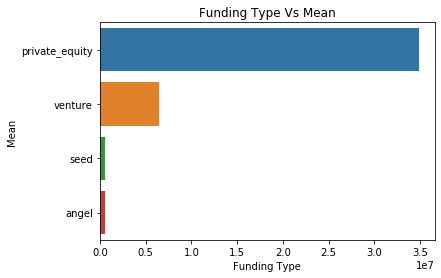

In [1625]:
mean_plot_x = ['private_equity', 'venture', 'seed', 'angel']
mean_plot_y = [private_equity_mean, venture_mean, seed_mean, angel_mean]
plt.title('Funding Type Vs Mean')
ax = sns.barplot(y=mean_plot_x, x=mean_plot_y)
ax.set(xlabel='Funding Type', ylabel='Mean')
plt.show()

### Plot of top 9 countries vs investment sum

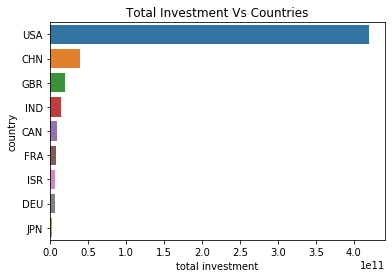

In [1626]:
plt.title('Total Investment Vs Countries')
ax = sns.barplot(data = top9, x='sum', y='country_code')
ax.set(xlabel='total investment', ylabel='country')
plt.show()

### Plot of top 3 major sectors Vs total number of investments for top3 English Speaking countries

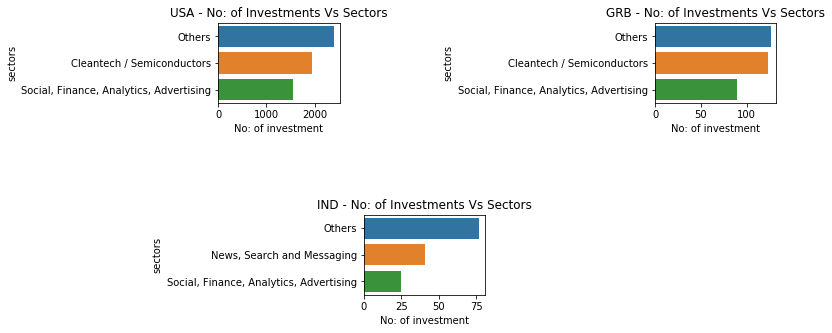

In [1627]:
gs = gridspec.GridSpec(3, 4)
plt.figure(figsize=(10, 5))
plt.subplot(gs[0, 0])
plt.title('USA - No: of Investments Vs Sectors')
ax = sns.barplot(data = c1_top3, y='main_sector', x='count')
ax.set(xlabel='No: of investment', ylabel='sectors')
plt.subplot(gs[0, 3])
plt.title('GRB - No: of Investments Vs Sectors')
ax = sns.barplot(data = c2_top3, y='main_sector', x='count')
ax.set(xlabel='No: of investment', ylabel='sectors')
plt.subplot(gs[2, 1])
plt.title('IND - No: of Investments Vs Sectors')
ax = sns.barplot(data = c3_top3, y='main_sector', x='count')
ax.set(xlabel='No: of investment', ylabel='sectors')
plt.show()